In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import koreanize_matplotlib
# 추가과제 
# 모든 설명변수를 feature로 할당하고, 그 정확도를 예측 
df=pd.read_csv("./winequality-white.csv", delimiter=";")

In [3]:
# 중복값 제거 
df=df[df.duplicated()==False].reset_index(drop=True)

In [5]:
# quality를 제외한 모든 열을 설명변수로 잡는다

feature=df[df.columns[0:-1]]
target=df[df.columns[-1]]

# 학습 데이터, 테스트 데이터 생성
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, stratify=target)

In [8]:
scaler=StandardScaler()
scaler.fit(x_train)
scaled_x_train=scaler.transform(x_train)
#============================================
scaler.fit(x_test)
scaler.mean_ # x_test의 평균을 출력 
scaled_x_test=scaler.transform(x_test)

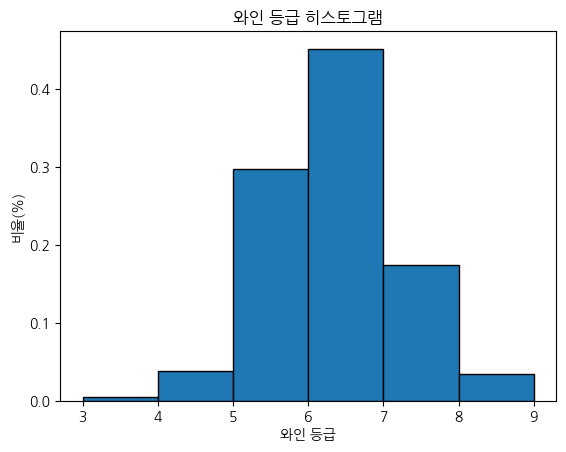

In [14]:
# 히스토그램 그리기
plt.hist(df["quality"], density=True, bins=range(3, 10), edgecolor='black')  # bins는 히스토그램의 막대 구간을 설정합니다.
plt.title("와인 등급 히스토그램")
plt.ylabel("비율(%)")
plt.xlabel("와인 등급")

plt.show()

In [18]:
# n_neighbors : k
# weights : i
# algorithm : j


test_scoreList=dict()
train_scoreList=dict()
for k in range(1,150,10):
    for i in ["uniform","distance"]:
        for j in ['auto', 'ball_tree', 'kd_tree', 'brute'] :
            model=KNeighborsClassifier(n_neighbors=k)
            model.fit(scaled_x_train, y_train)
            test_scoreList.setdefault((k,i,j),model.score(scaled_x_test, y_test))
            train_scoreList.setdefault((k,i,j),model.score(scaled_x_train,y_train))

In [25]:
max(test_scoreList, key=test_scoreList.get), max(test_scoreList.values())

((51, 'uniform', 'auto'), 0.5636822194199244)

quality를 제외한 모든 가능한 설명변수를 반영함

해당 조건으로 데이터를 정규화하고, 
KNN을 실행해 본 결과,

n_neighbors(이웃의 개수) : 51개 일 때 최대
weights(가중치 방식) : uniform 일 때 최대
algorithm(알고리즘) : auto 일 때 최대
